# Requesting Infrequent News Sources

There are a lot of news sources in my dataset that are shared so infrequently. I want to see if requesting them using Python's `request` package validates them as a site with the 200 response. This way I will know if they are just unpopular news sources of if there is something wrong with the way I extract my URLs.


## Reading data

In [1]:
import requests

import json
import csv
import os

import random
from collections import defaultdict, Counter
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd1 = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd1,"data/gm-newssources-subreddits")
dfp = os.path.join(pd1,"data")
mbfc_path = os.path.join(pd1, "data/mbfc")

In [3]:
with open (os.path.join(dfp,"gm_intersection.json"), "r", encoding = "utf-8") as infile:
    gm_intersection = json.load(infile)
len(gm_intersection)

42477

In [4]:
# Reading in all the subreddits in our files
with open(os.path.join(data_fp,"subreddit_ns_2021-01.json"), "r", encoding = "utf-8") as infile1a:
    subreddit_ns_jan = json.load(infile1a)

with open(os.path.join(data_fp,"subreddit_ns_2021-02.json"), "r", encoding = "utf-8") as infile2a:
    subreddit_ns_feb = json.load(infile2a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-03.json"), "r", encoding = "utf-8") as infile3a:
    subreddit_ns_march = json.load(infile3a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-04.json"), "r", encoding = "utf-8") as infile4a:
    subreddit_ns_april = json.load(infile4a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-05.json"), "r", encoding = "utf-8") as infile5a:
    subreddit_ns_may = json.load(infile5a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-06.json"), "r", encoding = "utf-8") as infile6a:
    subreddit_ns_jun = json.load(infile6a)

In [5]:
# ns_subreddit
with open(os.path.join(data_fp,"ns_subreddit_2021-01.json")) as infile1:
    ns_subreddit_01 = json.load(infile1)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-02.json")) as infile2:
    ns_subreddit_02 = json.load(infile2)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-03.json")) as infile3:
    ns_subreddit_03 = json.load(infile3)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-04.json")) as infile4:
    ns_subreddit_04 = json.load(infile4)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-05.json")) as infile5:
    ns_subreddit_05 = json.load(infile5)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-06.json")) as infile6:
    ns_subreddit_06 = json.load(infile6)

Disregarding non_news which are either hosts of users' generated content or news aggregators.

In [6]:
non_news = []
with open("non_news.csv", "r", encoding="utf-8") as nn:
    r = csv.reader(nn, delimiter=",")
    counter = 0
    for row in r:
        if counter != 0:
            non_news.append(row[0])
        counter += 1
len(non_news)

130

In [7]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [8]:
sr_union_old = (set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))
len(sr_union_old)

1619721

Let's exclude `u_`s and non_news

Removing usernames

In [9]:
u_s = [s for s in sr_union_old if s.startswith("u_")]
len(u_s)

910554

In [10]:
for f in files_sub:
    [f.pop(u) for u in u_s if u in f]

In [11]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

Removing non news

In [12]:
for f in files_sub:
    for n in f:
        if 'reddit.com' in f[n]: f[n].pop('reddit.com')
        # removing each of the non_news
        for nns in non_news:
            if nns in f[n]: f[n].pop(nns)
    print("Done for a file")

Done for a file
Done for a file
Done for a file
Done for a file
Done for a file
Done for a file


In [15]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

Removing empty subreddits

In [16]:
for s in files_sub:
    empty_subs = set()
    for k in s:
        if len(s[k]) == 0: empty_subs.add(k)
    print(len(empty_subs))
    [s.pop(u) for u in empty_subs]
    print("done for a file")

183592
done for a file
184349
done for a file
203649
done for a file
210354
done for a file
247206
done for a file
263501
done for a file


Instead of removing from files_ns, I will reconstruct files_ns from files_sub.

In [17]:
def ns_from_sub(subfile):
    d = defaultdict(dict)
    for sub in subfile:
        for n in subfile[sub]:
            d[n][sub] = subfile[sub][n]
    return d

In [18]:
ns_subreddit_01 = ns_from_sub(subreddit_ns_jan)
ns_subreddit_02 = ns_from_sub(subreddit_ns_feb)
ns_subreddit_03 = ns_from_sub(subreddit_ns_march)
ns_subreddit_04 = ns_from_sub(subreddit_ns_april)
ns_subreddit_05 = ns_from_sub(subreddit_ns_may)
ns_subreddit_06 = ns_from_sub(subreddit_ns_jun)

## Finding infrequent news sources

In [19]:
# union
ns_union = (set(ns_subreddit_01) |
       set(ns_subreddit_02) |
       set(ns_subreddit_03) |
       set(ns_subreddit_04) |
       set(ns_subreddit_05) |
       set(ns_subreddit_06))

len(ns_union)

23776

### for news sources that are mentioned in only a small number of subreddits

In [20]:
subreddit_count = dict()
for ns in ns_union:
    subreddit_count[ns] = len(set(ns_subreddit_01.get(ns, dict()).keys()) 
                               | set(ns_subreddit_02.get(ns, dict()).keys()) 
                               | set(ns_subreddit_03.get(ns, dict()).keys()) 
                               | set(ns_subreddit_04.get(ns, dict()).keys())
                               | set(ns_subreddit_05.get(ns, dict()).keys()) 
                               | set(ns_subreddit_06.get(ns, dict()).keys()))

In [21]:
subreddit_count['nytimes.com']

6085

In [22]:
subreddit_count_freq = dict(Counter(subreddit_count.values()).most_common())
subreddit_count_freq

{1: 4649,
 2: 2791,
 3: 1934,
 4: 1420,
 5: 1123,
 6: 929,
 7: 778,
 8: 675,
 9: 542,
 10: 475,
 11: 441,
 12: 358,
 14: 346,
 13: 328,
 15: 306,
 16: 272,
 17: 244,
 18: 223,
 21: 194,
 22: 192,
 19: 188,
 20: 184,
 24: 148,
 25: 140,
 23: 130,
 27: 125,
 26: 117,
 30: 115,
 31: 104,
 29: 102,
 28: 101,
 33: 101,
 35: 86,
 34: 85,
 32: 81,
 38: 80,
 37: 75,
 42: 68,
 41: 66,
 39: 65,
 48: 64,
 36: 63,
 49: 60,
 46: 60,
 45: 59,
 43: 59,
 40: 59,
 47: 57,
 53: 54,
 44: 53,
 54: 50,
 55: 49,
 57: 47,
 50: 44,
 56: 43,
 74: 41,
 64: 38,
 59: 37,
 61: 36,
 52: 35,
 51: 35,
 91: 33,
 63: 33,
 69: 30,
 76: 29,
 71: 28,
 72: 28,
 81: 27,
 62: 27,
 66: 27,
 70: 27,
 67: 27,
 58: 26,
 73: 26,
 60: 26,
 65: 25,
 84: 24,
 87: 24,
 78: 22,
 94: 22,
 75: 22,
 89: 22,
 82: 21,
 68: 21,
 79: 20,
 96: 20,
 88: 19,
 105: 19,
 86: 19,
 77: 19,
 106: 18,
 92: 18,
 113: 18,
 103: 18,
 80: 17,
 104: 16,
 85: 16,
 101: 15,
 120: 15,
 90: 15,
 100: 15,
 93: 15,
 114: 15,
 141: 14,
 135: 14,
 95: 13,
 117: 1

In [23]:
sde_ranked = Counter(subreddit_count).most_common()

for t in sde_ranked[:10]:
    sr, co = t
    if co > 1:
        print(f"{sr} is mentioned in {co} subreddits.")

theguardian.com is mentioned in 6309 subreddits.
nytimes.com is mentioned in 6085 subreddits.
cnn.com is mentioned in 5588 subreddits.
bbc.com is mentioned in 4680 subreddits.
fandom.com is mentioned in 4586 subreddits.
reuters.com is mentioned in 4180 subreddits.
washingtonpost.com is mentioned in 3958 subreddits.
forbes.com is mentioned in 3872 subreddits.
cnbc.com is mentioned in 3665 subreddits.
bloomberg.com is mentioned in 3556 subreddits.


In [24]:
sum(subreddit_count_freq.values()) == len(ns_union)

True

In [25]:
scf = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in subreddit_count_freq.items()))

Text(0.5, 1.0, 'number of news sources appearing in x subreddits')

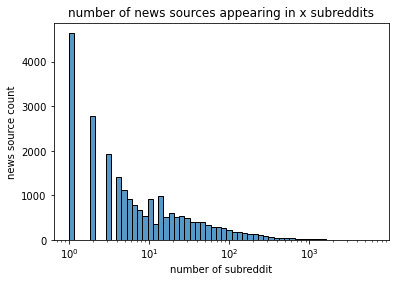

In [26]:
# sns.histplot([math.log(s,10) for s in scf])
sns.histplot(scf, log_scale=True)
plt.xlabel("number of subreddit")
plt.ylabel("news source count")
plt.title("number of news sources appearing in x subreddits")

Let's investigate the news sources mentioned in less than or equal 5 subreddits

In [27]:
lt5 = [k for k in subreddit_count if subreddit_count[k] <= 5]
len(lt5)

11917

In [28]:
# percentage
len(lt5)*100/len(subreddit_count)

50.12197173620458

### Validation

I will use `requests` to see if randomly sampled 10% of these 11.9k sites are valid sites

In [29]:
sampleLinks = random.sample(lt5, int(0.1*len(lt5)))
len(sampleLinks)

1191

In [30]:
sampleLinks

['wiltshiretimes.co.uk',
 'developer-tech.com',
 'heatworld.com',
 'semiconductor-today.com',
 'dontwasteyourmoney.com',
 'moreechampion.com.au',
 'forestparkreview.com',
 'huntingtoningalls.com',
 'newswatchman.com',
 'eurodns.com',
 'kirklandreporter.com',
 'biotechniques.com',
 'roodepoortrecord.co.za',
 'maoritelevision.com',
 'gremio.net',
 'saultthisweek.com',
 'bnpparibas.com',
 'phaidon.com',
 'clarivate.com',
 'cityscenecolumbus.com',
 'manuscriptcentral.com',
 'root.cz',
 'ftfnews.com',
 'mondafrique.com',
 'cb.com.cn',
 'nomadicnotes.com',
 'communitynews.org',
 'phl17.com',
 'ahoramismo.com',
 'allaboutsymbian.com',
 'dsnews.ua',
 'mymoinfo.com',
 'animeuknews.net',
 'alcoholprofessor.com',
 'punktastic.com',
 'vn.at',
 'sidewalkhustle.com',
 'britishmuslim-magazine.com',
 'mmofallout.com',
 'paperjam.lu',
 'power97.com',
 'hr.com',
 'ualr.edu',
 'corporate-ir.net',
 'govoritmoskva.ru',
 'usforacle.com',
 'thetimes.cl',
 'woodbine.com',
 'propertyweek.com',
 'howlround.com'

In [31]:
statusCodes = {}
ssl_error = []
other_errors = []
counter = 0


for u in sampleLinks:
    url = "https://" + u
    try:
        r = requests.get(url, auth=('user', 'pass'))
        statusCodes[url] = r.status_code
    except requests.exceptions.SSLError:
        ssl_error.append(url)
    except:
        other_errors.append(url)
        
    counter += 1
    if counter%20 == 0:
        print("Have requested {} sites, for now: \t {}".format(counter, Counter(statusCodes.values())))

Have requested 20 sites, for now: 	 Counter({200: 14, 403: 4})
Have requested 40 sites, for now: 	 Counter({200: 30, 403: 6, 503: 1})
Have requested 60 sites, for now: 	 Counter({200: 44, 403: 9, 503: 1})
Have requested 80 sites, for now: 	 Counter({200: 59, 403: 11, 503: 2})
Have requested 100 sites, for now: 	 Counter({200: 73, 403: 12, 503: 3, 404: 1})
Have requested 120 sites, for now: 	 Counter({200: 89, 403: 12, 503: 3, 404: 1})
Have requested 140 sites, for now: 	 Counter({200: 103, 403: 14, 503: 3, 404: 2})
Have requested 160 sites, for now: 	 Counter({200: 115, 403: 17, 503: 3, 404: 3})
Have requested 180 sites, for now: 	 Counter({200: 131, 403: 18, 503: 3, 404: 3})
Have requested 200 sites, for now: 	 Counter({200: 146, 403: 20, 503: 3, 404: 3})
Have requested 220 sites, for now: 	 Counter({200: 161, 403: 21, 503: 3, 404: 3})
Have requested 240 sites, for now: 	 Counter({200: 177, 403: 23, 503: 3, 404: 3})
Have requested 260 sites, for now: 	 Counter({200: 196, 403: 23, 503:

In [32]:
Counter(statusCodes.values())

Counter({200: 922,
         403: 123,
         503: 7,
         404: 5,
         406: 13,
         400: 1,
         418: 1,
         520: 2,
         500: 1,
         526: 1})

In [33]:
len(ssl_error)

56

In [34]:
len(other_errors)

59

In [35]:
922/len(sampleLinks)

0.7741393786733837

In [36]:
123/len(sampleLinks)

0.10327455919395466

In [37]:
(922+56)/len(sampleLinks)

0.8211586901763224

In [38]:
123/len(sampleLinks)

0.10327455919395466

In [39]:
(7+5+15+5+59)/len(sampleLinks)

0.0764063811922754